In [53]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


In [54]:
sync_ratio_dataset = [100.0, 66.66666666666666, 51.28205128205128, 94.87179487179486, 78.125, 100.0, 100.0, 80.76923076923077, 53.57142857142857, 90.0, 80.0, 96.42857142857143, 97.2972972972973, 51.42857142857142, 100.0, 47.27272727272727, 94.73684210526315, 100.0, 100.0, 100.0, 62.06896551724138, 83.6734693877551, 92.5925925925926, 55.55555555555556, 100.0, 95.91836734693877, 100.0, 97.72727272727273, 50.0, 100.0, 96.29629629629629, 100.0, 100.0, 100.0, 86.95652173913044, 71.73913043478261, 97.2972972972973, 92.3076923076923, 53.84615384615385, 20.51282051282051, 100.0, 89.70588235294117, 97.26027397260275, 96.7741935483871, 100.0, 100.0, 31.372549019607842, 80.76923076923077, 92.15686274509804, 88.04347826086956, 95.74468085106383, 95.91836734693877, 100.0, 90.2439024390244, 94.11764705882352, 100.0, 95.23809523809523, 97.82608695652173, 87.5, 82.14285714285714, 100.0, 95.91836734693877, 92.0, 92.3076923076923, 100.0, 100.0, 97.87234042553192, 100.0, 94.73684210526315, 70.0, 100.0, 89.1891891891892, 100.0, 100.0, 90.69767441860465, 87.75510204081633, 95.55555555555556, 100.0, 100.0, 100.0, 62.745098039215684, 85.36585365853658, 100.0, 100.0, 97.5, 97.22222222222221, 96.0, 97.43589743589743, 100.0, 93.02325581395348, 96.0, 100.0, 100.0, 98.21428571428571, 100.0, 97.72727272727273, 90.625, 100.0, 82.85714285714286, 93.75, 100.0, 96.7741935483871, 78.46153846153847, 100.0, 97.95918367346938, 88.63636363636364, 95.1219512195122, 96.61016949152543, 79.62962962962963, 78.84615384615384, 92.0, 100.0, 82.6086956521739, 75.34246575342466, 75.67567567567568, 85.71428571428571, 100.0, 93.75, 86.95652173913044, 92.15686274509804, 91.83673469387756, 70.58823529411765, 92.7536231884058, 100.0, 72.72727272727273, 75.0, 47.22222222222222, 89.70588235294117, 85.71428571428571, 95.74468085106383, 100.0, 96.29629629629629, 100.0, 100.0, 41.37931034482759, 95.0, 82.92682926829268, 100.0, 97.22222222222221, 100.0, 92.98245614035088, 92.98245614035088, 92.85714285714286, 
80.0, 95.65217391304348, 54.54545454545454, 92.5925925925926, 95.83333333333334, 0.0, 94.28571428571428, 100.0, 95.1219512195122, 100.0, 92.85714285714286, 97.5, 100.0, 80.76923076923077, 86.3013698630137, 98.21428571428571, 97.82608695652173, 90.0, 100.0, 63.33333333333333, 81.81818181818183, 100.0, 94.44444444444444, 95.34883720930233, 76.0, 39.705882352941174, 83.72093023255815, 96.0, 29.78723404255319, 68.18181818181817, 90.76923076923077, 100.0, 95.45454545454545, 92.06349206349206, 100.0, 84.84848484848484, 100.0, 100.0, 81.25, 90.69767441860465, 87.71929824561403, 100.0, 3.4482758620689653, 97.22222222222221, 97.05882352941177, 74.4186046511628, 81.63265306122449, 61.53846153846154, 50.0, 83.33333333333334, 80.59701492537313, 100.0, 100.0, 80.0, 97.61904761904762, 100.0, 91.42857142857143, 86.88524590163934, 100.0, 100.0, 93.75, 9.30232558139535, 90.38461538461539, 93.10344827586206, 92.3076923076923, 100.0, 98.0, 86.11111111111111, 80.0, 63.63636363636363, 88.50574712643679, 20.0, 92.85714285714286, 75.0, 84.61538461538461, 100.0, 97.67441860465115, 100.0, 95.1219512195122, 97.77777777777777, 91.83673469387756, 84.90566037735849, 97.77777777777777, 100.0, 100.0, 100.0, 80.95238095238095, 73.68421052631578, 100.0, 95.45454545454545, 84.0, 86.20689655172413, 89.65517241379311, 92.0, 95.0, 66.66666666666666, 88.57142857142857, 94.23076923076923, 76.19047619047619, 100.0, 100.0, 100.0, 97.82608695652173, 81.25, 100.0, 94.44444444444444, 100.0, 100.0, 100.0, 100.0, 88.88888888888889, 100.0, 91.83673469387756, 100.0, 87.03703703703704, 100.0, 96.0, 58.536585365853654, 15.492957746478872, 100.0, 100.0, 100.0, 83.87096774193549, 82.75862068965517, 92.10526315789474, 95.45454545454545, 68.18181818181817, 100.0, 64.70588235294117, 100.0, 100.0, 93.02325581395348, 86.66666666666667, 91.17647058823529, 97.43589743589743, 80.0, 80.0, 80.0, 97.77777777777777, 100.0, 100.0, 70.6896551724138, 100.0, 96.29629629629629, 78.72340425531915, 100.0, 75.67567567567568, 100.0, 100.0, 93.47826086956522, 100.0, 96.42857142857143, 72.41379310344827, 100.0, 97.2972972972973, 79.3103448275862, 61.904761904761905, 100.0, 96.22641509433963, 97.82608695652173, 97.22222222222221, 88.46153846153845, 75.0, 100.0, 100.0, 76.92307692307693, 48.275862068965516, 88.33333333333333, 35.0, 71.42857142857143, 76.08695652173914, 83.33333333333334, 100.0, 100.0, 86.3013698630137, 94.73684210526315, 93.93939393939394, 85.18518518518519, 26.666666666666668, 88.37209302325581, 100.0, 54.54545454545454, 49.152542372881356, 76.92307692307693, 100.0, 98.4375, 95.45454545454545, 93.10344827586206, 46.51162790697674, 100.0, 100.0, 90.625, 50.0, 95.34883720930233, 81.48148148148148, 93.61702127659575, 93.47826086956522, 58.333333333333336, 86.66666666666667, 94.0, 100.0, 100.0, 100.0, 90.32258064516128, 100.0, 100.0, 98.57142857142858, 100.0, 100.0, 100.0, 94.44444444444444, 94.64285714285714, 88.88888888888889, 72.0, 100.0, 97.36842105263158, 78.26086956521739, 80.0, 100.0, 100.0, 96.0, 100.0, 100.0, 96.15384615384616, 86.20689655172413, 92.85714285714286, 97.5, 86.66666666666667, 94.82758620689656, 100.0, 97.43589743589743, 100.0, 100.0, 80.85106382978722, 100.0, 92.85714285714286, 90.38461538461539, 97.22222222222221, 100.0, 100.0, 81.57894736842105, 85.71428571428571, 98.78048780487805, 100.0, 96.36363636363636, 97.91666666666666, 100.0, 96.36363636363636, 100.0, 74.13793103448276, 96.96969696969697, 81.57894736842105, 56.41025641025641, 78.18181818181819, 71.05263157894737, 96.61016949152543, 98.30508474576271, 94.73684210526315, 98.30508474576271, 100.0, 53.333333333333336, 100.0, 100.0, 96.66666666666667]


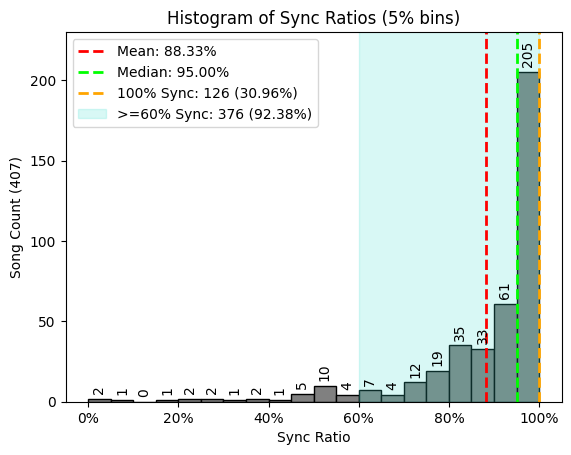

In [185]:
df = pd.DataFrame({"sync_ratio": sync_ratio_dataset})
count_100 = df.sync_ratio.value_counts()[100]

count_above_60 = sum(1 for value in sync_ratio_dataset if value >= 60)
count_above_80 = sum(1 for value in sync_ratio_dataset if value >= 80)

# Calculate mean and median
sync_ratio_dataset_mean = statistics.mean(sync_ratio_dataset)
sync_ratio_dataset_median = statistics.median(sync_ratio_dataset)

# Define the bins
bins = np.arange(0, 105, 5)

# Create the histogram
plt.hist(sync_ratio_dataset, bins=bins, edgecolor='black', color='grey')

# Add vertical lines for mean and median with percentage labels
plt.axvline(sync_ratio_dataset_mean, color='red', linestyle='dashed', linewidth=2,
            label=f'Mean: {sync_ratio_dataset_mean:.2f}%')
plt.axvline(sync_ratio_dataset_median, color='lime', linestyle='dashed', linewidth=2,
            label=f'Median: {sync_ratio_dataset_median:.2f}%')
plt.axvline(100, color='orange', linestyle='dashed', linewidth=2,
            label=f'100% Sync: {count_100} ({count_100 / len(sync_ratio_dataset) * 100:.2f}%)')

plt.fill_betweenx(y=[0, 270], x1=60, x2=100, color='turquoise', alpha=0.2, label=f'>=60% Sync: {count_above_60} ({count_above_60 / len(sync_ratio_dataset) * 100:.2f}%)')

# Set labels and title
plt.xlabel('Sync Ratio')
plt.ylabel('Song Count (407)')
plt.title('Histogram of Sync Ratios (5% bins)')

# Format x-axis as percentages
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 100:.0%}'))

plt.ylim(0, 230)

# Add legend
plt.legend()

def ca(count):
    if count >= 999:
        return f" ({round(count / len(sync_ratio_dataset) * 100)}%)"
    else :
        return ""

# Add counts above the bars
for bin_val, count in zip(bins[:-1], np.histogram(sync_ratio_dataset, bins=bins)[0]):
    plt.text(bin_val + 2.5, count + 5, str(count) + ca(count), color='black', ha='center', rotation=90)

# Show the plot
plt.show()

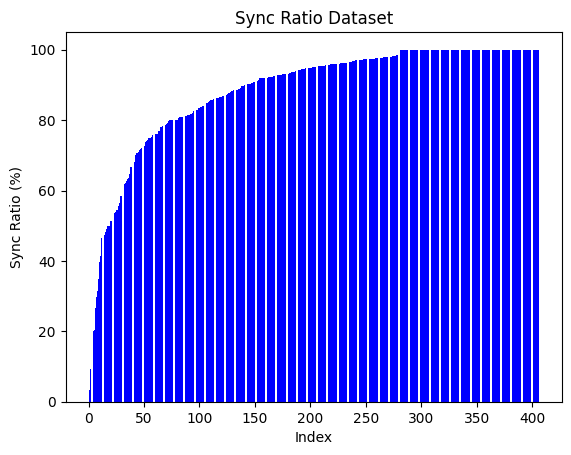

In [186]:
plt.bar(range(len(sorted(sync_ratio_dataset))), sorted(sync_ratio_dataset), color='blue')
plt.xlabel('Index')
plt.ylabel('Sync Ratio (%)')
plt.title('Sync Ratio Dataset')
plt.show()

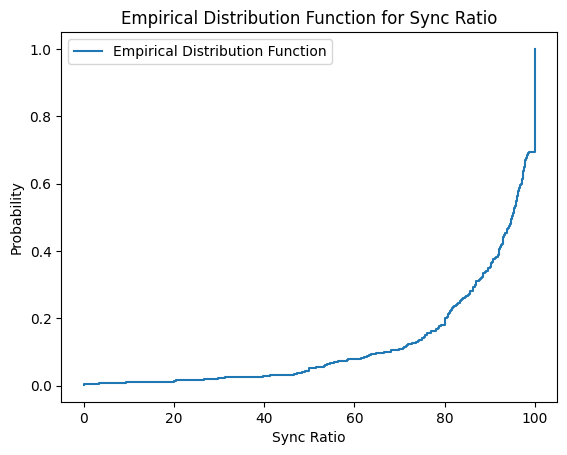

In [187]:
# Sort the dataset
sorted_data = np.sort(sync_ratio_dataset)

# Create the empirical distribution function (ECDF)
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Plot the ECDF
plt.step(sorted_data, ecdf, label='Empirical Distribution Function')
plt.xlabel('Sync Ratio')
plt.ylabel('Probability')
plt.title('Empirical Distribution Function for Sync Ratio')
plt.legend()
plt.show()